In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
def plot_coefficients(ax, alphas, coefficients, title):
    ax.plot(alphas, coefficients)
    ax.legend(cols) # Income, Limit, Rating, Student
    ax.set_title(title)
    ax.set_xscale('log')
    ax.set_xlabel('alpha')
    ax.set_ylabel('Standardized Coefficients')

In [3]:
credit_data = pd.read_csv('../data/credit.csv')

In [4]:
label_encoder = LabelEncoder()
X_data = credit_data.drop(['ID', 'Balance'], axis=1)
X_data['Student'] = X_data['Student'].map({'No': 0, 'Yes': 1})
X_data['Married'] = X_data['Married'].map({'No': 0, 'Yes': 1})
X_data['Gender'] = X_data['Gender'].map({'Female': 0, ' Male': 1})
X_data['Ethnicity'] = label_encoder.fit_transform(X_data['Ethnicity'])

In [5]:
scaler = StandardScaler()
X = X_data.to_numpy()
X = scaler.fit_transform(X)

y = credit_data['Balance'].to_numpy()

In [6]:
# create alphas 
num_alphas = 1000
ridge_alphas = np.logspace(-2, 5, num_alphas)
lasso_alphas = np.logspace(0, 3, num_alphas)

# create empty array to store coefficients
ridge_coefficients = np.zeros((num_alphas, X.shape[1])) 
lasso_coefficients = np.zeros_like(ridge_coefficients)

In [7]:
# calculate coefficients for alphas
for ridge_alpha, row in zip(ridge_alphas, range(num_alphas)):
    ridge_model = Ridge(alpha=ridge_alpha)
    ridge_model.fit(X, y)
    ridge_coefficients[row, :] = ridge_model.coef_
    
for lasso_alpha, row in zip(lasso_alphas, range(num_alphas)):
    lasso_model = Lasso(alpha=lasso_alpha)
    lasso_model.fit(X, y)
    lasso_coefficients[row, :] = lasso_model.coef_    

In [8]:
# color lines for the following columns 
cols = ['Income', 'Limit', 'Rating', 'Student']
col_indices = [X_data.columns.get_loc(col) for col in cols]

top_4_ridge = ridge_coefficients[:, col_indices]
lowest_6_ridge = np.delete(ridge_coefficients, col_indices, axis=1)

top_4_lasso = lasso_coefficients[:, col_indices]
lowest_6_lasso = np.delete(lasso_coefficients, col_indices, axis=1)

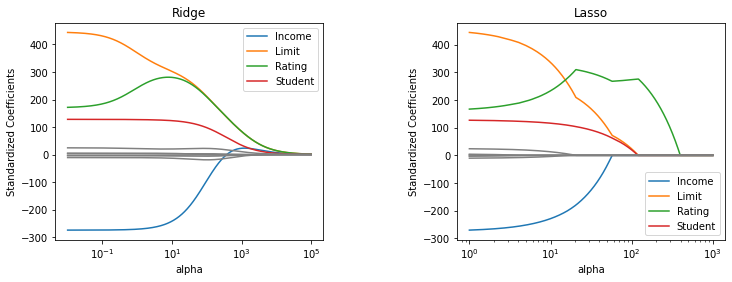

In [9]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)

plot_coefficients(ax1, ridge_alphas, top_4_ridge, 'Ridge')
ax1.plot(ridge_alphas, lowest_6_ridge, 'gray')

plot_coefficients(ax2, lasso_alphas, top_4_lasso, 'Lasso')
ax2.plot(lasso_alphas, lowest_6_lasso, 'gray')
plt.subplots_adjust(wspace=0.5)
plt.show()